In [1]:
import numpy as np

In [2]:
x = [2, 4, 6]
mx = np.mean(x)
print(mx)

4.0


In [4]:
for i in x:
    print(i)

2
4
6


In [6]:
data = [i ** 2 for i in x]
for i in data:
    print(i)
tot = sum(data)    
print('tot:', tot)

4
16
36
tot: 56


In [7]:
x = [0, 2, 4, 6, 8] # 독립 변수
y = [79, 81, 93, 91, 97] # 종속 변수

mx = np.mean(x)
my = np.mean(y)
print(mx, my)

4.0 88.2


In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

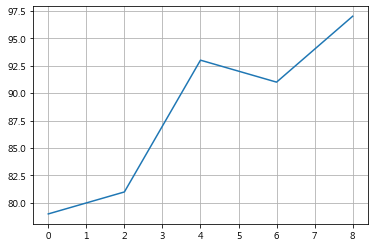

In [9]:
plt.plot(x, y)
plt.grid(True)
plt.show()

In [10]:
# f(x) = ax + b, y = ax + b
#                (x - x 평균)(y - y 평균)의 합   <- x, y의 편차의 곱을 합
#     a 기울기 = ─────────────
#                 (x - x 평균)의 제곱의 합        <- x 편차 제곱의 합

# 분모
divisor = [i - mx  for i in x]
print(divisor)  # 편차 출력

divisor = np.sum([i - mx  for i in x])
print(divisor)  # 편차의 합은 0

divisor = np.sum([(i - mx) ** 2  for i in x])
print(divisor)  # x 편차 제곱의 합

[-4.0, -2.0, 0.0, 2.0, 4.0]
0.0
40.0


In [11]:
# (x - x 평균)(y - y 평균)의 합
child = 0 # 분자
for i in range(len(x)): # 0 ~ n-1
    child = child + (x[i] - mx ) * (y[i] - my)
    
print(child)    

92.0


In [18]:
# y = ax + b
a = child / divisor
# b(y 절편) = y의 평균 - (x의 평균 X 기울기 a)
b = my - (mx * a)
print('최종 선형회귀 모델: y={0}x + {1}'.format(a, b))  

최종 선형회귀 모델: y=2.3x + 79.0


In [19]:
print('검증')
print('공부 시간\t실제 성적 값\t예측') # \t: tab
for i in range(len(x)):
    print(str(x[i]) + '\t\t' + str(y[i]) + '\t\t' + str(float(a*x[i] + b)))

검증
공부 시간	실제 성적 값	예측
0		79		79.0
2		81		83.6
4		93		88.2
6		91		92.8
8		97		97.4


In [25]:
# x = [2, 4, 6, 8] # 독립 변수
# y = [81, 93, 91, 97] # 종속 변수

predict = [] # 예측 요소

for i in range(len(x)):
    predict.append(float(a*x[i] + b))  # y=2.3x + 79.0
    print(predict[i])

79.0
83.6
88.2
92.8
97.4


In [26]:
diff = 0 # 오차의 합
for i in range(len(x)):
    pred = float(a*x[i] + b)
    print('{0} - {1} = {2}'.format(pred, y[i], (pred - y[i]) ))
    diff = diff + pred - y[i] # 오차의 합
    
print('오차의 합:', diff)

79.0 - 79 = 0.0
83.6 - 81 = 2.5999999999999943
88.2 - 93 = -4.799999999999997
92.8 - 91 = 1.7999999999999972
97.4 - 97 = 0.4000000000000057
오차의 합: 0.0


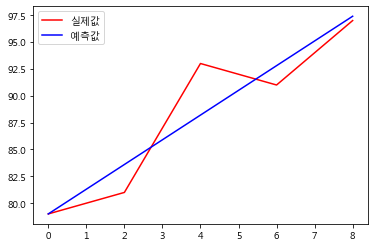

In [27]:
plt.plot(x, y, color='red', label='실제값')
plt.plot(x, predict, color='blue', label='예측값')
plt.legend()
plt.show()

In [28]:
# 학습 시간 10시간의 예상 성적
y = a * 10 + b
print(y, '점 취득 예상됨')

102.0 점 취득 예상됨


In [29]:
# 공부를 못한경우
y = a * 0 + b
print(y, '점 취득 예상됨')

79.0 점 취득 예상됨
